In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from redcap import Project
sns.set()

api_url = 'https://redcap.vanderbilt.edu/api/'

## Data import

In [10]:
clinical_key = open("/Users/fonnescj/Dropbox/Tokens/crux_clinical.txt").read()
clinical_proj = Project(api_url, clinical_key)
clinical_raw = clinical_proj.export_records(format='df', 
                    df_kwargs={'index_col': clinical_proj.field_names[0],
                              'parse_dates': ['child_dob', 'ados_date']})

/Users/fonnescj/anaconda3/envs/dev/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2787: DtypeWarning: Columns (0,259,465,672,927) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [22]:
clinical_raw.shape

(3395, 1180)

Dropping columns with >70% missing

In [36]:
clinical_complete = clinical_raw.dropna(thresh=int(0.3*clinical_raw.shape[0]), axis=1)
clinical_complete.shape

(3395, 121)

In [37]:
clinical_complete.columns

Index(['child_dob', 'ados_date', 'age_ados', 'ados_module', 'ados_2',
       'ados_new_algorithm', 'ados_severity', 'ados_classification',
       'ados_raw_1_a1', 'ados_raw_1_a2',
       ...
       'iqmeasure_2014___3', 'iqmeasure_2014___4', 'iqmeasure_2014___5',
       'iqmeasure_2014___6', 'iqmeasure_2014___7', 'iqmeasure_2014___8',
       'iqmeasure_2014___9', 'iqmeasure_2014___10', 'iqmeasure_2014___11',
       'iqmeasure_2014___12'],
      dtype='object', length=121)

In [39]:
demographics_key = open("/Users/fonnescj/Dropbox/Tokens/crux_demographics.txt").read()
demographics_proj = Project(api_url, demographics_key)
demographics_raw = demographics_proj.export_records(format='df', 
                    df_kwargs={'index_col': demographics_proj.field_names[0],
                              'parse_dates': ['child_dob']})

In [40]:
demographics_raw.shape

(3739, 71)

In [41]:
demographics_complete = demographics_raw.dropna(thresh=int(0.3*demographics_raw.shape[0]), 
                                                axis=1)
demographics_complete.shape

(3739, 55)

In [42]:
demographics_complete.columns

Index(['study_id', 'referral_study___1', 'referral_study___2',
       'referral_study___3', 'referral_study___4', 'referral_study___5',
       'referral_study___6', 'referral_study___7', 'referral_study___8',
       'referral_study___9', 'referral_study___10', 'referral_study___11',
       'referral_study___12', 'referral_study___13', 'referral_study___14',
       'referral_study___15', 'referral_study___16', 'referral_study___17',
       'referral_study___18', 'referral_study___19', 'referral_study___20',
       'referral_study___22', 'referral_study___23', 'referral_study___24',
       'referral_study___25', 'baby_sib', 'control', 'triad_consent',
       'contact_consent', 'data_consent', 'child_first_name',
       'child_last_name', 'child_dob', 'child_sex', 'psychologist',
       'diagnosis___1', 'diagnosis___2', 'diagnosis___3', 'diagnosis___4',
       'diagnosis___5', 'diagnosis___6', 'diagnosis___7', 'diagnosis___8',
       'diagnosis___9', 'diagnosis___10', 'mothers_firstname',

Age distribution of clinical data

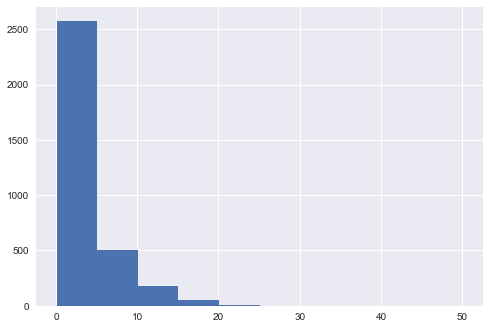

In [44]:
clinical_complete.age_ados.hist();